# Inequalities of Marseille a long the metro M2

In [1]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import json
import matplotlib.pyplot as plt

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 200
#matplotlib.rcParams['svg.fonttype'] = 'none'

In [3]:
#iris selction
iris_csv = 'iris_selection.csv'

iris_selection = pd.read_csv(iris_csv, header=0, names=['ligne', 'code_iris', 'lib_iris'])

In [4]:
iris_selection['code_iris'] = iris_selection['code_iris'].astype('str')

In [5]:
iris_selection['code_iris'].nunique()

50

## Revenus

Data from: https://www.insee.fr/fr/statistiques/3288151, from December 2014

In [83]:
#file path
revenu_file = 'data/BASE_TD_FILO_DEC_IRIS_2014.xls'

revenu = pd.read_excel(revenu_file, skiprows=5)

In [7]:
revenu['IRIS'] = revenu['IRIS'].astype('str')

NameError: name 'revenu' is not defined

In [85]:
revenu_m2 = iris_selection.merge(revenu, left_on='code_iris', right_on='IRIS')

In [87]:
revenu_m2

,ligne,code_iris,lib_iris,IRIS,LIBIRIS,COM,LIBCOM,DEC_PIMP14,DEC_TP6014,DEC_Q114,...,DEC_D914,DEC_RD14,DEC_S80S2014,DEC_GI14,DEC_PTSA14,DEC_PCHO14,DEC_PBEN14,DEC_PPEN14,DEC_PAUT14,note
0,Bougainville,132150501,Zoccolat,132150501,Zoccolat,13215,Marseille 15e Arrondissement,13.441483,83.960059,1738.0,...,15030.0,NaN,1421.814867,0.502808,55.3,11.8,0.5,30.6,1.8,0
1,Bougainville,132140302,Casanova,132140302,Casanova,13214,Marseille 14e Arrondissement,27.017115,70.221704,870.0,...,20968.0,NaN,2267.168856,0.544484,55.1,6.3,1.6,34.8,2.2,0
2,National,132030304,Briancon,132030304,Briancon,13203,Marseille 3e Arrondissement,NaN,79.588993,2488.0,...,15916.0,NaN,140.373675,0.482422,NaN,NaN,NaN,NaN,NaN,0
3,National,132030306,Bellevue-Pyat,132030306,Bellevue-Pyat,13203,Marseille 3e Arrondissement,NaN,NaN,212.0,...,13504.0,NaN,NaN,0.534798,NaN,NaN,NaN,NaN,NaN,0
4,National,132030403,Fonscolombes,132030403,Fonscolombes,13203,Marseille 3e Arrondissement,21.021611,74.336283,2723.0,...,19686.0,NaN,99.594715,0.511922,61.8,8.7,3.0,25.5,1.0,0
5,Désirée Clary,132030401,Potier,132030401,Potier,13203,Marseille 3e Arrondissement,26.176471,72.052717,2078.0,...,21788.0,NaN,556.819773,0.542199,50.8,6.7,2.1,37.2,3.2,0
6,Désirée Clary,132030402,Peyssonnel,132030402,Peyssonnel,13203,Marseille 3e Arrondissement,41.413311,51.201201,4392.0,...,32100.0,1146.428571,40.635837,0.483874,61.5,4.3,2.5,27.8,3.9,1
7,Désirée Clary,132020402,Albrand-Ponteves,132020402,Albrand-Ponteves,13202,Marseille 2e Arrondissement,28.456221,69.284510,1494.0,...,24548.0,NaN,484.969755,0.547742,59.6,6.1,2.7,28.8,2.8,0
8,Joliette,132020401,l'Eveche-Les Docks,132020401,l'Eveche-Les Docks,13202,Marseille 2e Arrondissement,54.810883,36.766917,7138.0,...,41972.0,38.827012,25.677386,0.449899,75.4,4.6,4.2,11.6,4.2,0
9,Joliette,132020404,Mazenod-Republique,132020404,Mazenod-Republique,13202,Marseille 2e Arrondissement,38.530735,53.962901,4384.0,...,29034.0,116.136000,43.756620,0.482058,66.0,5.0,2.6,23.1,3.3,0


In [94]:
revenu_m2[['ligne', 'LIBIRIS', 'IRIS', 'DEC_MED14']]

,ligne,LIBIRIS,IRIS,DEC_MED14
0,Bougainville,Zoccolat,132150501,5484.0
1,Bougainville,Casanova,132140302,6274.0
2,National,Briancon,132030304,6344.0
3,National,Bellevue-Pyat,132030306,4882.0
4,National,Fonscolombes,132030403,7084.0
5,Désirée Clary,Potier,132030401,6682.0
6,Désirée Clary,Peyssonnel,132030402,11866.0
7,Désirée Clary,Albrand-Ponteves,132020402,6406.0
8,Joliette,l'Eveche-Les Docks,132020401,17732.0
9,Joliette,Mazenod-Republique,132020404,11534.0


In [9]:
revenu_m2_median = revenu_m2.groupby(['ligne'], sort=False).DEC_MED14.mean()

In [10]:
revenu_m2_median

ligne
Bougainville                          5879.000000
National                              6103.333333
Désirée Clary                         8318.000000
Joliette                             12854.250000
Jules Guesde                          7238.800000
Saint-Charles                         9848.000000
Noailles                              8763.500000
Notre-Dame-du-Mont - Cours Julien    18334.666667
Castellane                           20032.000000
Périer                               27578.800000
Rond-point du Prado                  24451.500000
Sainte-Marguerite Dromel             18033.000000
Name: DEC_MED14, dtype: float64

In [13]:
revenu_m2_median.to_csv('revenue.csv', float_format='%.1f')

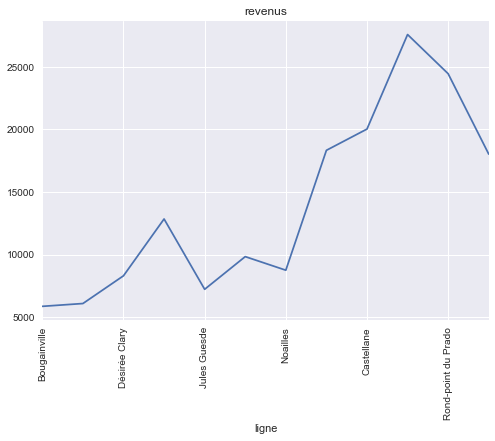

In [92]:
revenu_m2_median.plot(kind='line', rot=90, title='revenus')

## Population

Newest version I found so far: https://www.insee.fr/fr/statistiques/3137409, 2014

In [6]:
#file path
population_file = 'data/base-ic-evol-struct-pop-2014.xls'

population = pd.read_excel(population_file, skiprows=5)

In [8]:
population['IRIS'] = population['IRIS'].astype('str')

In [9]:
population_m2 = iris_selection.merge(population, left_on='code_iris', right_on='IRIS')

In [11]:
population_m2['code_iris'].nunique()

50

In [13]:
population_m2[['ligne', 'LIBIRIS', 'P14_POP']]

,ligne,LIBIRIS,P14_POP
0,Bougainville,Zoccolat,2546.180111
1,Bougainville,Casanova,2018.959953
2,National,Briancon,1660.269477
3,National,Bellevue Caravelle,1446.414693
4,National,Bellevue-Pyat,981.792411
5,National,Fonscolombes,2754.440522
6,Désirée Clary,Potier,2704.009354
7,Désirée Clary,Peyssonnel,3036.411639
8,Désirée Clary,Albrand-Ponteves,1998.832054
9,Joliette,l'Eveche-Les Docks,2875.852126


In [14]:
population_m2_pop_total = population_m2.groupby(['ligne'], sort=False).P14_POP.sum()

In [15]:
population_m2_pop_total

ligne
Bougainville                          4565.140065
National                              6842.917103
Désirée Clary                         7739.253046
Joliette                              7981.623750
Jules Guesde                         10094.498828
Saint-Charles                         9172.188066
Noailles                              9751.941774
Notre-Dame-du-Mont - Cours Julien     7081.357702
Castellane                           15830.686559
Périer                               11725.493630
Rond-point du Prado                  12163.482732
Sainte-Marguerite Dromel              7068.945821
Name: P14_POP, dtype: float64

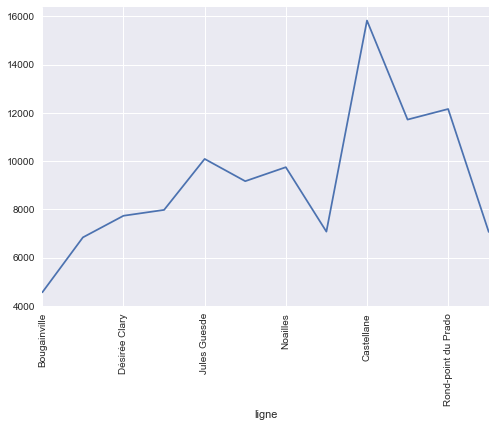

In [16]:
population_m2_pop_total.plot(kind='line', rot=90)

### Hommes et femmes

In [141]:
# nombre d'hommes

population_m2_pop_gender = population_m2.groupby(['ligne'], sort=False, as_index=False)['P13_POP', 'P13_POPH', 'P13_POPF'].sum()

In [143]:
population_m2_pop_gender['percent_man'] = population_m2_pop_gender['P13_POPH'] * 100 / population_m2_pop_gender['P13_POP']

population_m2_pop_gender['percent_woman'] = population_m2_pop_gender['P13_POPF'] * 100 / population_m2_pop_gender['P13_POP']


In [144]:
population_m2_pop_gender

,ligne,P13_POP,P13_POPH,P13_POPF,percent_man,percent_woman
0,Bougainville,4917.231427,2578.701833,2338.529594,52.442149,47.557851
1,National,6615.003177,3236.424708,3378.578469,48.925520,51.074480
2,Désirée Clary,7520.182322,3590.526936,3929.655386,47.745211,52.254789
3,Joliette,7462.314934,3808.950405,3653.364530,51.042477,48.957523
4,Jules Guesde,9616.166554,5101.915365,4514.251189,53.055605,46.944395
5,Saint-Charles,9028.986516,4811.961882,4217.024634,53.294596,46.705404
6,Noailles,9239.722659,4867.969914,4371.752744,52.685238,47.314762
7,Notre-Dame-du-Mont - Cours Julien,7090.619017,3327.398937,3763.220080,46.926776,53.073224
8,Castellane,15804.936150,7116.508580,8688.427570,45.027126,54.972874
9,Périer,11441.643608,5191.740602,6249.903006,45.375829,54.624171


### Immigration

In [17]:
# nombre d'immigrés / "Migrationshintergrund"

population_m2_pop_imm = population_m2.groupby(['ligne'], sort=False).P14_POP_IMM.sum()

In [18]:
population_m2_pop_imm

ligne
Bougainville                         1031.248182
National                             2234.402124
Désirée Clary                        2082.572217
Joliette                             1780.759093
Jules Guesde                         3394.946341
Saint-Charles                        3294.030489
Noailles                             3275.283760
Notre-Dame-du-Mont - Cours Julien    1014.449601
Castellane                           1916.118969
Périer                               1379.566432
Rond-point du Prado                  1341.946083
Sainte-Marguerite Dromel              849.463320
Name: P14_POP_IMM, dtype: float64

In [19]:
# nombre de français

population_m2_pop_fr = population_m2.groupby(['ligne'], sort=False).P14_POP_FR.sum()

In [20]:
population_m2_pop_fr

ligne
Bougainville                          3643.259830
National                              5244.638428
Désirée Clary                         6197.947904
Joliette                              6583.418683
Jules Guesde                          7332.440131
Saint-Charles                         6514.700821
Noailles                              7265.833801
Notre-Dame-du-Mont - Cours Julien     6346.051563
Castellane                           14573.895215
Périer                               10861.774588
Rond-point du Prado                  11458.162832
Sainte-Marguerite Dromel              6621.698654
Name: P14_POP_FR, dtype: float64

In [21]:
# nombre d'étrangers

population_m2_pop_etr = population_m2.groupby(['ligne'], sort=False).P14_POP_ETR.sum()

In [22]:
population_m2_pop_etr

ligne
Bougainville                          921.880235
National                             1598.278675
Désirée Clary                        1541.305142
Joliette                             1398.205066
Jules Guesde                         2762.058697
Saint-Charles                        2657.487245
Noailles                             2486.107973
Notre-Dame-du-Mont - Cours Julien     735.306139
Castellane                           1256.791344
Périer                                863.719042
Rond-point du Prado                   705.319900
Sainte-Marguerite Dromel              447.247166
Name: P14_POP_ETR, dtype: float64

In [23]:
population_m2_immigration_df = pd.concat([population_m2_pop_total, population_m2_pop_etr, population_m2_pop_fr, population_m2_pop_imm], axis=1).reset_index()

In [24]:
population_m2_immigration_df['percent_immigration'] = population_m2_immigration_df['P14_POP_IMM'] * 100 / population_m2_immigration_df['P14_POP'] 

In [26]:
population_m2_immigration_df['percent_francais'] = population_m2_immigration_df['P14_POP_FR'] * 100 / population_m2_immigration_df['P14_POP'] 

In [28]:
population_m2_immigration_df['percent_etranger'] = population_m2_immigration_df['P14_POP_ETR'] * 100 / population_m2_immigration_df['P14_POP'] 

In [30]:
population_m2_immigration_df.to_csv('pop.csv', index=False)

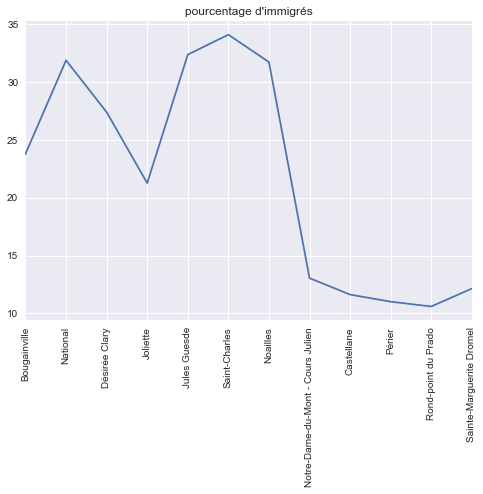

In [136]:
ax = population_m2_immigration_df['percent_immigration'].plot(xticks=population_m2_immigration_df.index, rot=90, title="pourcentage d'immigrés")
ax.set_xticklabels(population_m2_immigration_df.ligne)

### Age

In [32]:
# age, under 18, over 65

population_m2_pop_age = population_m2.groupby(['ligne'], sort=False, as_index=False)['P14_POP','P14_POP0002', 'P14_POP0305', 'P14_POP0610', 'P14_POP1117', 'P14_POP6579', 'P14_POP80P'].sum()

population_m2_pop_age['total_under_18'] = population_m2_pop_age['P14_POP0002'] + population_m2_pop_age['P14_POP0305'] + population_m2_pop_age['P14_POP0610'] + population_m2_pop_age['P14_POP1117']

population_m2_pop_age['total_over_65'] = population_m2_pop_age['P14_POP6579'] + population_m2_pop_age['P14_POP80P']

In [34]:
population_m2_pop_age['percent_under18'] = population_m2_pop_age['total_under_18'] * 100 / population_m2_pop_age['P14_POP']

population_m2_pop_age['percent_over65'] = population_m2_pop_age['total_over_65'] * 100 / population_m2_pop_age['P14_POP'] 

In [35]:
population_m2_pop_age = population_m2_pop_age[['ligne', 'total_under_18', 'total_over_65', 'percent_under18', 'percent_over65']]

In [36]:
population_m2_pop_age

,ligne,total_under_18,total_over_65,percent_under18,percent_over65
0,Bougainville,1375.637250,728.922304,30.133517,15.967140
1,National,2450.522613,645.977916,35.811081,9.440096
2,Désirée Clary,1896.160080,1384.781476,24.500557,17.892960
3,Joliette,1834.313696,893.933679,22.981711,11.199897
4,Jules Guesde,2263.987304,1731.597571,22.427932,17.153874
5,Saint-Charles,2094.468093,1045.560933,22.834989,11.399253
6,Noailles,1903.339606,1073.483504,19.517545,11.007895
7,Notre-Dame-du-Mont - Cours Julien,1270.731746,907.614875,17.944747,12.816961
8,Castellane,2468.102121,3369.555129,15.590620,21.284959
9,Périer,2128.091997,2701.272106,18.149274,23.037598


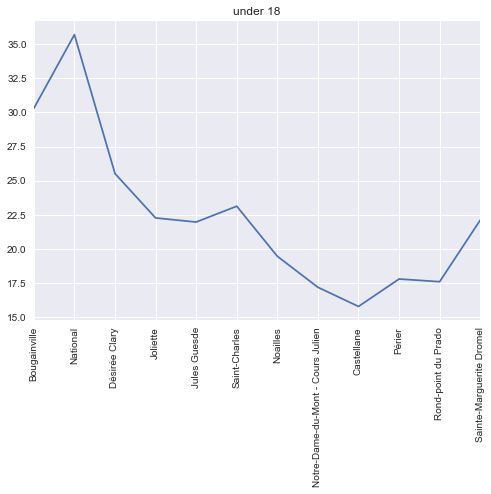

In [164]:
ax = population_m2_pop_age['percent_under18'].plot(xticks=population_m2_pop_age.index, rot=90, title="under 18")
ax.set_xticklabels(population_m2_pop_age.ligne)

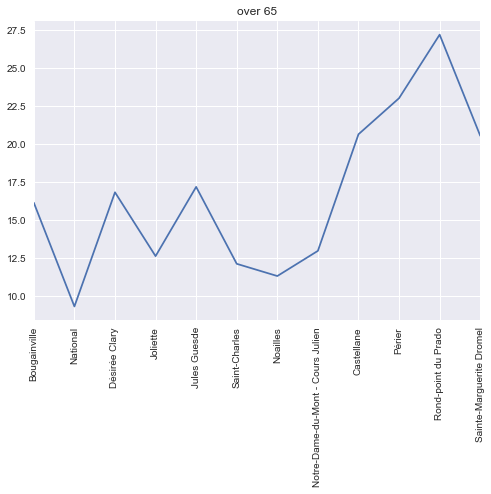

In [165]:
ax = population_m2_pop_age['percent_over65'].plot(xticks=population_m2_pop_age.index, rot=90, title="over 65")
ax.set_xticklabels(population_m2_pop_age.ligne)

## Logements
Data from: https://www.insee.fr/fr/statistiques/3141877?sommaire=2866354, 2014

In [3]:
from simpledbf import Dbf5

dbf_logement = Dbf5('data/FD_LOGEMTZE_2014.dbf')

df_logement = dbf_logement.to_dataframe()

In [16]:
df_logement.head()

,COMMUNE,ARM,IRIS,ACHL,AEMM,AEMMR,AGEMEN8,ANEM,ANEMR,ASCEN,...,STOCD,SURF,TACTM,TPM,TRANSM,TRIRIS,TYPC,TYPL,VOIT,WC
0,01001,ZZZZZ,ZZZZZZZZZ,311,2013,9,25,003,01,2,...,21,6,11,1,4,ZZZZZZ,1,1,2,Z
1,01001,ZZZZZ,ZZZZZZZZZ,311,2011,9,25,005,02,2,...,10,5,11,1,4,ZZZZZZ,1,1,2,Z
2,01001,ZZZZZ,ZZZZZZZZZ,212,1974,6,65,042,06,2,...,10,4,21,Z,Z,ZZZZZZ,1,1,1,Z
3,01001,ZZZZZ,ZZZZZZZZZ,311,2000,9,65,016,03,2,...,10,5,21,Z,Z,ZZZZZZ,1,1,1,Z
4,01001,ZZZZZ,ZZZZZZZZZ,212,1988,7,80,028,04,2,...,10,7,21,Z,Z,ZZZZZZ,1,1,0,Z


In [12]:
df_logement['IRIS'] = df_logement['IRIS'].astype('str')

In [13]:
logement_m2 = iris_selection.merge(df_logement, left_on='code_iris', right_on='IRIS')

In [15]:
logement_m2.to_csv('data/logement_m2.csv')

In [19]:
logement_m2['INEEM']

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       Y
19       0
20       0
21       0
22       2
23       2
24       0
25       0
26       1
27       1
28       0
29       0
30       0
31       0
32       0
33       1
34       0
35       1
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       Y
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       1
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       2
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

## Tourism

Data from: http://observatoire-airbnb.fr/les-donnees/provence-alpes-cote-dazur/marseille, Extract from September 2017

In [20]:
#file path
airbnb_file = 'data/airbnb_m2_selection.csv'

airbnb = pd.read_csv(airbnb_file)

In [34]:
airbnb['Ligne'] = pd.Categorical(airbnb['Ligne'], ["Bougainville", "National", "Désirée Clary", "Joliette", "Jules Guesde", "Saint-Charles", "Noailles", "Notre-Dame-du-Mont - Cours Julien", "Castellane", "Périer", "Rond-point du Prado", "Sainte-Marguerite Dromel"])

In [38]:
airbnb.sort_values(by="Ligne")

,DEPCOM,NOM_COM,IRIS,DCOMIRIS,NOM_IRIS,TYP_IRIS,Ligne,LIB_IRIS,NUMPOINTS
49,13215,Marseille 15e Arrondissement,501,132150501,Zoccolat,H,Bougainville,Zoccolat,0
48,13214,Marseille 14e Arrondissement,302,132140302,Casanova,H,Bougainville,Casanova,2
21,13203,Marseille 3e Arrondissement,304,132030304,Briancon,A,National,Briancon,7
19,13203,Marseille 3e Arrondissement,305,132030305,Bellevue Caravelle,H,National,Bellevue Caravelle,0
18,13203,Marseille 3e Arrondissement,403,132030403,Fonscolombes,H,National,Fonscolombes,4
24,13203,Marseille 3e Arrondissement,306,132030306,Bellevue-Pyat,H,National,Bellevue-Pyat,0
8,13202,Marseille 2e Arrondissement,402,132020402,Albrand-Ponteves,H,Désirée Clary,Albrand-Ponteves,8
22,13203,Marseille 3e Arrondissement,401,132030401,Potier,H,Désirée Clary,Potier,4
20,13203,Marseille 3e Arrondissement,402,132030402,Peyssonnel,H,Désirée Clary,Peyssonnel,17
7,13202,Marseille 2e Arrondissement,404,132020404,Mazenod-Republique,H,Joliette,Mazenod-Republique,35


In [41]:
airbnb_sum = airbnb.groupby(['Ligne']).NUMPOINTS.sum()

In [42]:
airbnb_sum

Ligne
Bougainville                           2
National                              11
Désirée Clary                         29
Joliette                             237
Jules Guesde                          45
Saint-Charles                        138
Noailles                             302
Notre-Dame-du-Mont - Cours Julien    203
Castellane                           283
Périer                               134
Rond-point du Prado                  148
Sainte-Marguerite Dromel              29
Name: NUMPOINTS, dtype: int64

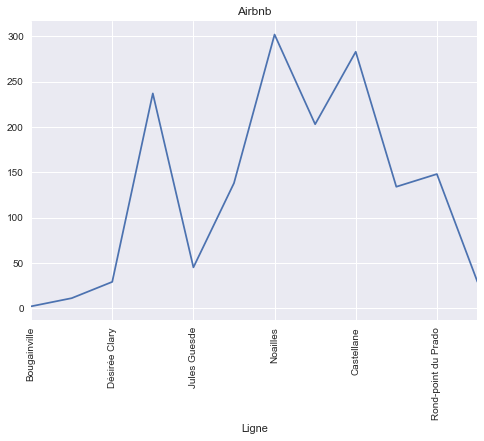

In [48]:
airbnb_sum.plot(kind='line', rot=90, title='Airbnb')

In [78]:
#file path
hotel_file = 'data/equip-tour-transp-infra-2016.xls'

hotel = pd.read_excel(hotel_file, skiprows=5)

In [79]:
hotel['IRIS'] = hotel['IRIS'].astype('str')

In [80]:
hotel_m2 = iris_selection.merge(hotel, left_on='code_iris', right_on='IRIS')

In [81]:
hotel_count = hotel_m2.groupby(['ligne'], sort=False).NB_G102.sum()

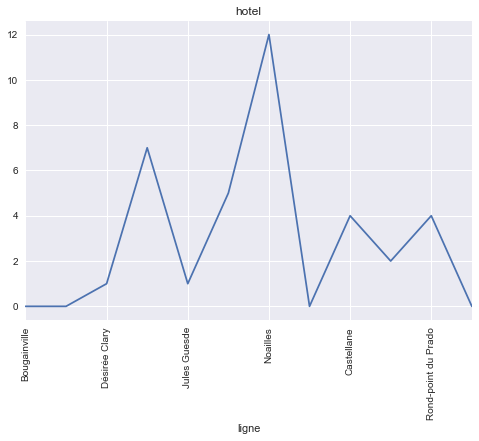

In [82]:
hotel_count.plot(kind='line', rot=90, title='hotel')

## Commerces

In [77]:
#file path
commerce_file = 'data/equip-serv-commerce-infra-2016.xls'

commerce = pd.read_excel(commerce_file, skiprows=5)

#### Can't find iris Bellevue Caravalle

In [28]:
commerce['IRIS'] = commerce['IRIS'].astype('str')

In [29]:
commerce_m2 = iris_selection.merge(commerce, left_on='code_iris', right_on='IRIS')

In [39]:
epicerie = commerce_m2.groupby(['ligne'], sort=False).NB_B301.sum()

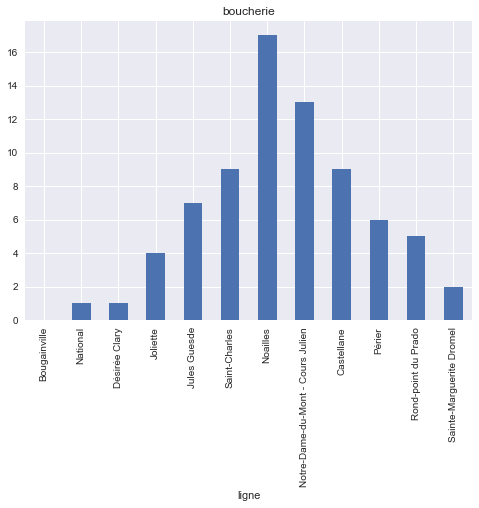

In [95]:
epicerie.plot(kind='bar', rot=90, title='boucherie')

## Action sociale

In [54]:
#file path
social_file = 'data/equip-serv-action-sociale-infra-2016.xls'

social = pd.read_excel(social_file, skiprows=5)

In [55]:
social['IRIS'] = social['IRIS'].astype('str')

In [56]:
social_m2 = iris_selection.merge(social, left_on='code_iris', right_on='IRIS')

In [59]:
creches = social_m2.groupby(['ligne'], sort=False).NB_D402.sum()

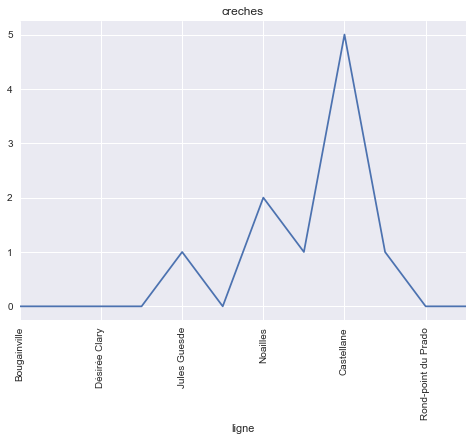

In [60]:
creches.plot(kind='line', rot=90, title='creches')

## Health

In [62]:
#file path
health_file = 'data/equip-serv-medical-para-infra-2016.xls'

health = pd.read_excel(health_file, skiprows=5)

In [63]:
health['IRIS'] = health['IRIS'].astype('str')

In [64]:
health_m2 = iris_selection.merge(health, left_on='code_iris', right_on='IRIS')

In [70]:
psycho = health_m2.groupby(['ligne'], sort=False).NB_D243.sum()

In [96]:
psycha = health_m2.groupby(['ligne'], sort=False).NB_D201.sum()

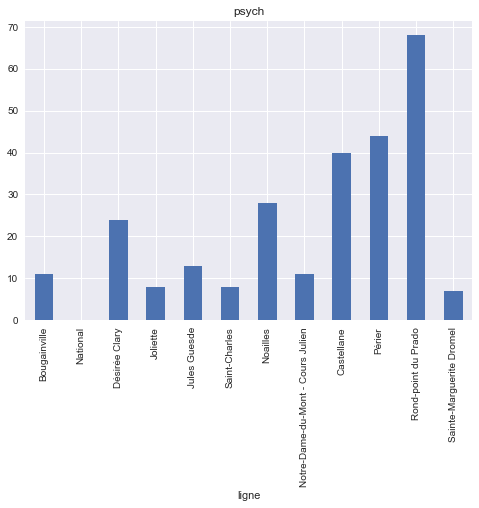

In [97]:
psycha.plot(kind='bar', rot=90, title='psych')

#omnipraticien

## Arbres

Data from Open Street Map, extracted on February 20 2018

In [49]:
#file path
tree_file = 'data/tree_m2.csv'

tree = pd.read_csv(tree_file)

In [51]:
tree['Ligne'] = pd.Categorical(tree['Ligne'], ["Bougainville", "National", "Désirée Clary", "Joliette", "Jules Guesde", "Saint-Charles", "Noailles", "Notre-Dame-du-Mont - Cours Julien", "Castellane", "Périer", "Rond-point du Prado", "Sainte-Marguerite Dromel"])

In [52]:
tree_sum = tree.groupby(['Ligne']).NUMPOINTS.sum()

In [53]:
tree_sum

Ligne
Bougainville                          49
National                             146
Désirée Clary                         31
Joliette                             782
Jules Guesde                         172
Saint-Charles                        320
Noailles                             415
Notre-Dame-du-Mont - Cours Julien    187
Castellane                             1
Périer                                17
Rond-point du Prado                  136
Sainte-Marguerite Dromel              56
Name: NUMPOINTS, dtype: int64

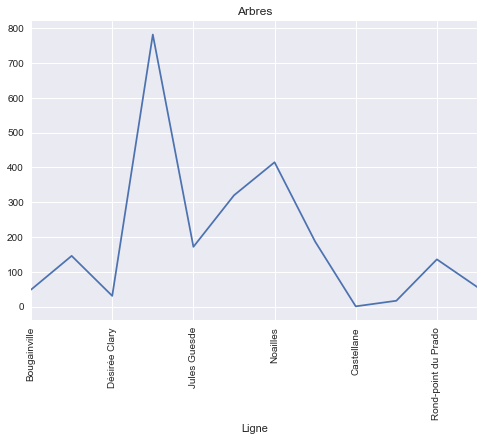

In [54]:
tree_sum.plot(kind='line', rot=90, title='Arbres')

## Final Export

In [38]:
export = population_m2_immigration_df.merge(population_m2_pop_age, left_on='ligne', right_on='ligne')

In [40]:
export.to_csv('export.csv', index=False)